<a href="https://colab.research.google.com/github/paurush11/Assignment1_csv/blob/main/ML_Data_Cleaning_and_Feature_Selection_Paurush_Batish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Sci Eng Methods
Assignment 1 – ML Data Cleaning and Feature Selection
ML Data Cleaning and Feature Selection** 

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:


1.   What are the data types? (Only numeric and categorical)

2.  Are there missing values?

3. What are the likely distributions of the numeric variables?

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

5. Which independent variables have missing data? How much?

6. Do the training and test sets have the same data?

7. In the predictor variables independent of all the other predictor variables?

8. Which predictor variables are the most important?

9. 
Do the ranges of the predictor variables make sense?

10. What are the distributions of the predictor variables?
11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?
12. 
Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.




#Abstract
Income evaluation dataset has a lot of features and the main goal is to predict whether the income is above or less than 50K per year. We also have to see that what all features are relevent and which features are related to each other.We have also made use of various techniques such as covariance matrix , VIF factor and also designed our model based on random forest cclassification so that the data that we get is accurate and we can come to conclusion about various useful independent variables. Our dataset has various attributes as listed below:-
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Data Set**

The data set consists of :


1.   Nine categorical features and six numeric features
2.   Income column is the target variable
3.   41 countries have been choosen for the dataset
4.   There are a total of 32562 observations.


In [1]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 6.6 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=7b8e168614409517c69e9a0c70f29c1482045096b96b41b82c81f676421748cb
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/paurush11/Assignment1_csv/main/income_evaluation.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


View dimensions of the dataset and data types of columns

 **Q- What are the data types? (Only numeric and categorical)?**

---



In [5]:
#dimensions
print("Dimensions",data.shape)
print("\n")
#data types
print(data.info())

Dimensions (32561, 15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


**Continous features: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week.**

**Categorical features: workclass, education, marital-status, occupation, relationship, race, sex, native-country, income.**

**Q - What are the distributions of the predictor variables?**

In [6]:
continuous_features=data.describe()
continuous_features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
categorical_features= data.describe(include=['object'])
categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


**Q - What are the likely distributions of the numeric variables?**



**Q - Do the ranges of the predictor variables make sense?**

In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


  Based on these observations we can see see the likely distributions of our data along with mean and std. Now we will see if the data is normally distributed or not. So we are going to see that using qq plots


       age   education-num   capital-gain   capital-loss   hours-per-week
0       39              13           2174              0               40
1       50              13              0              0               13
2       38               9              0              0               40
3       53               7              0              0               40
4       28              13              0              0               40
...    ...             ...            ...            ...              ...
32556   27              12              0              0               38
32557   40               9              0              0               40
32558   58               9              0              0               40
32559   22               9              0              0               20
32560   52               9          15024              0               40

[32561 rows x 5 columns]
age


<Figure size 576x360 with 0 Axes>

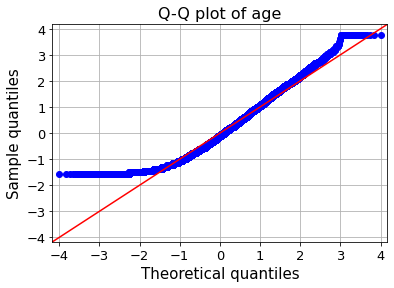

 education-num


<Figure size 576x360 with 0 Axes>

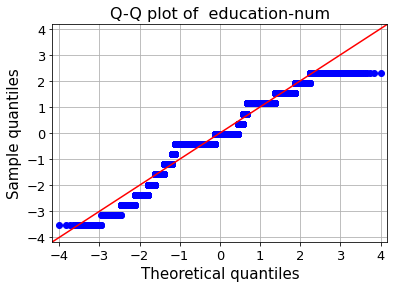

 capital-gain


<Figure size 576x360 with 0 Axes>

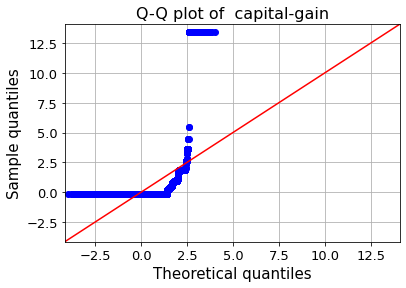

 capital-loss


<Figure size 576x360 with 0 Axes>

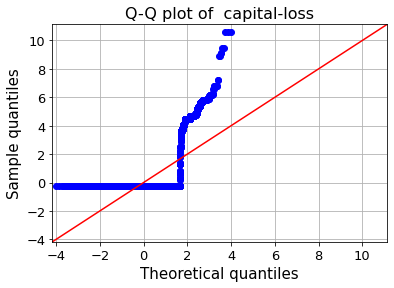

 hours-per-week


<Figure size 576x360 with 0 Axes>

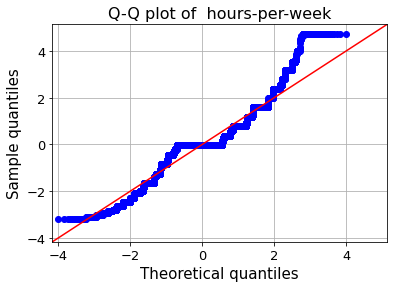

In [9]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['age',' education-num', ' capital-gain', ' capital-loss',' hours-per-week']]
print(data_norm)
for c in data_norm.columns[:]:
    print(c)
    plt.figure(figsize=(8,5))
    fig=qqplot(data_norm[c],line='45',fit='True')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles",fontsize=15)
    plt.ylabel("Sample quantiles",fontsize=15)
    plt.title("Q-Q plot of {}".format(c),fontsize=16)
    plt.grid(True)
    plt.show()

*With help of qq plot the age and hours_per_week is approximate or absolutely normally distributed*

We have also seen the values of the various continuous features. Every feature has a good range of values for eg - age has a max value of 90 and min value of 17. All the data makes sense. But we still have to check for any missing values.

**Q- Are there any missing values?**

In [10]:
#checking if the any data is missing
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

We also need to check the value_counts for our features to be sure that our values make sense and we can also find another information.

**Q-Which independent variables have missing data? How much?**

In [11]:
for col in data.columns:
    print("Column:",col, "\n\n", data[col].value_counts(),"\n")

Column: age 

 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64 

Column:  workclass 

  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64 

Column:  fnlwgt 

 164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name:  fnlwgt, Length: 21648, dtype: int64 

Column:  education 

  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th   

In [12]:
data[' workclass'].replace(' ?', np.NaN, inplace=True)
data[' occupation'].replace(' ?', np.NaN, inplace=True)
data[' native-country'].replace(' ?', np.NaN, inplace=True)

From the given observations we saw that **'native-country', 'occupation' and ' workclass'** have ? value counts.

Hence we saw that our data that was actually not missing but had some nan values. so we replaced the ? with np.NaN so as to perform uniformity. We could also replace the data with mean or node values.

**Q - Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**


**We will use 3 mothods-**
1. Correlation Analysis

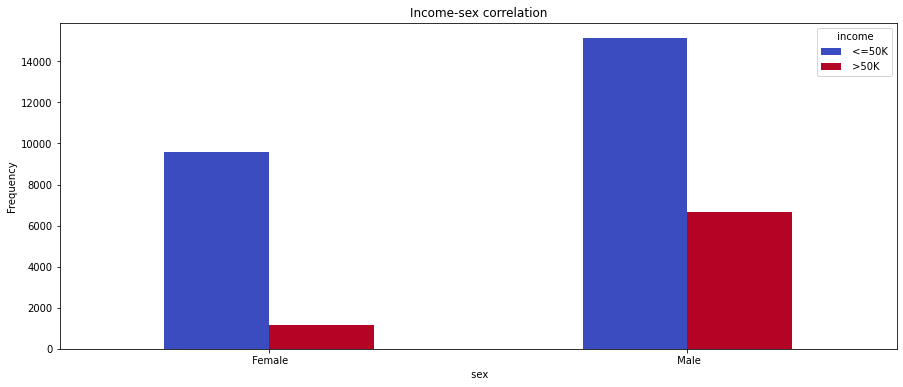

In [13]:
pd.crosstab(data[' sex'],data[' income']).plot(kind="bar",figsize=(15,6),colormap="coolwarm")
plt.title('Income-sex correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

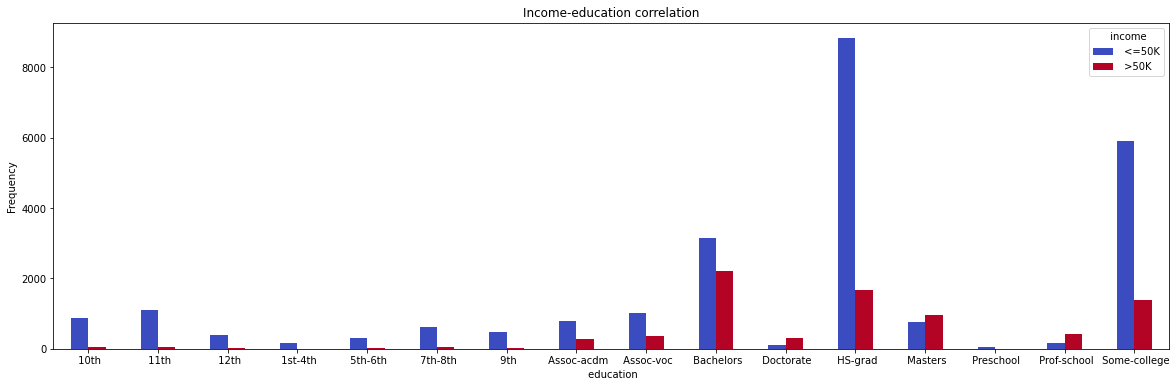

In [14]:
pd.crosstab(data[' education'],data[' income']).plot(kind="bar",figsize=(20,6), colormap="coolwarm")
plt.title('Income-education correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


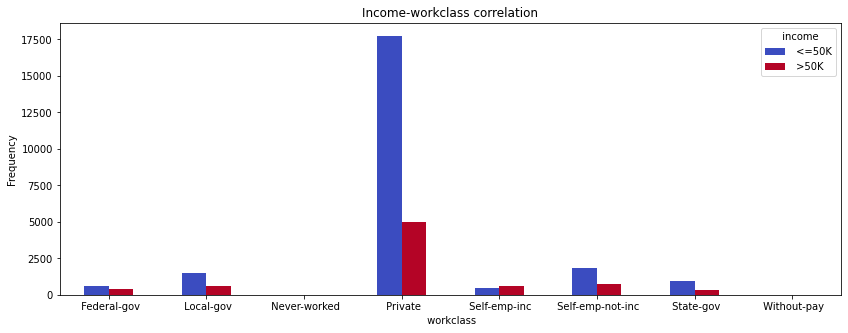

In [15]:
pd.crosstab(data[' workclass'],data[' income']).plot(kind="bar",figsize=(14,5), colormap="coolwarm")
plt.title('Income-workclass correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

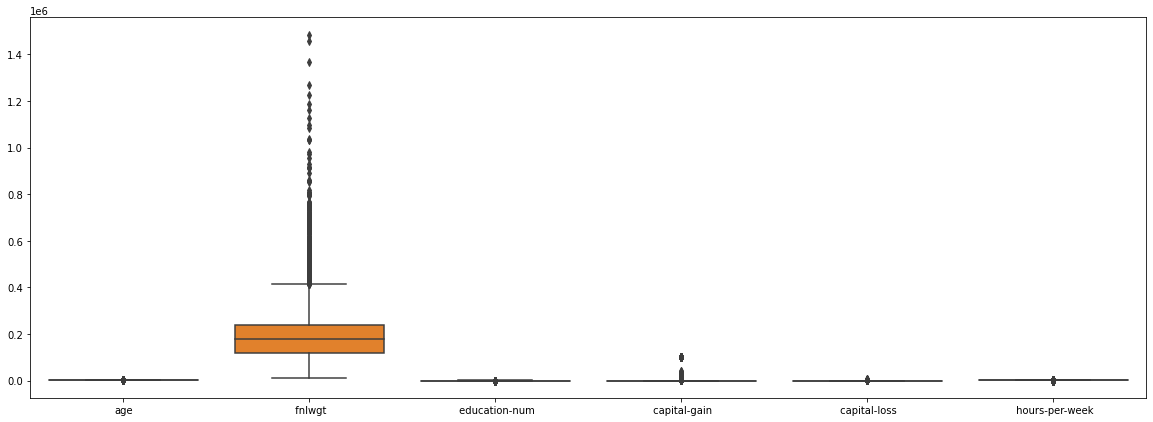

In [16]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

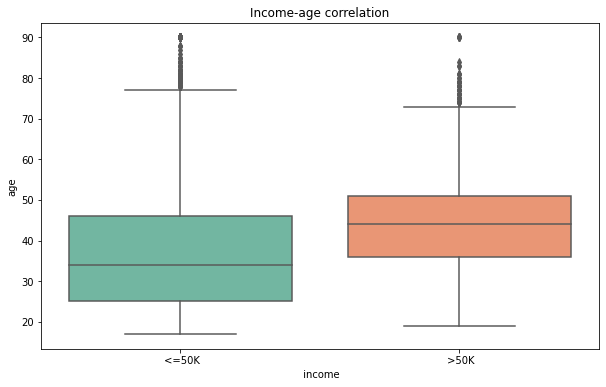

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("Set2")
ax = sns.boxplot(x=" income", y="age", data=data)
ax.set_title("Income-age correlation")
plt.show()

From the given data we have computed the corelation between income and age and we have found out that median age of people making less money is around 34 while people making more than 50k  have a median age greater than or equal 46. This was expected as young people make less amount of money.

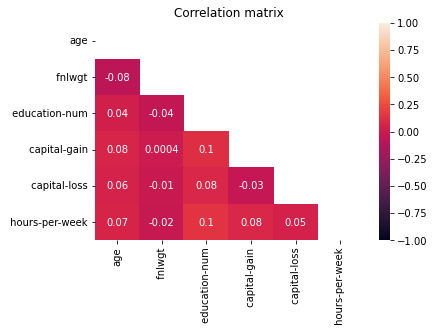

In [18]:
corr = data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix')
plt.show()

In [19]:
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        if abs(corr.iloc[i, j]) > 0.8:
            print(f"Predictor variables {corr.columns[i]} and {corr.columns[j]} are highly correlated.")

The above code suggests that if any predictor variables have a correlation value greater than 0.8 they must be highly correlated. Since none of them suggests the results we can saftely move on to another approach to calcualte variance inversion factor.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
predictors = [' education-num', 'age', ' hours-per-week', ' capital-gain']
X = data[predictors].values

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
for idx, val in enumerate(vif):
    print(f"VIF for {predictors[idx]}: {val}")

VIF for  education-num: 10.317567447178297
VIF for age: 7.146467988897144
VIF for  hours-per-week: 9.423322779756127
VIF for  capital-gain: 1.0299706597871745


A VIF of 1 indicates that there is no multicollinearity between the predictor variable and the other predictor variables in the model. A VIF greater than 1 indicates that the predictor variable is correlated with one or more other predictor variables in the model.


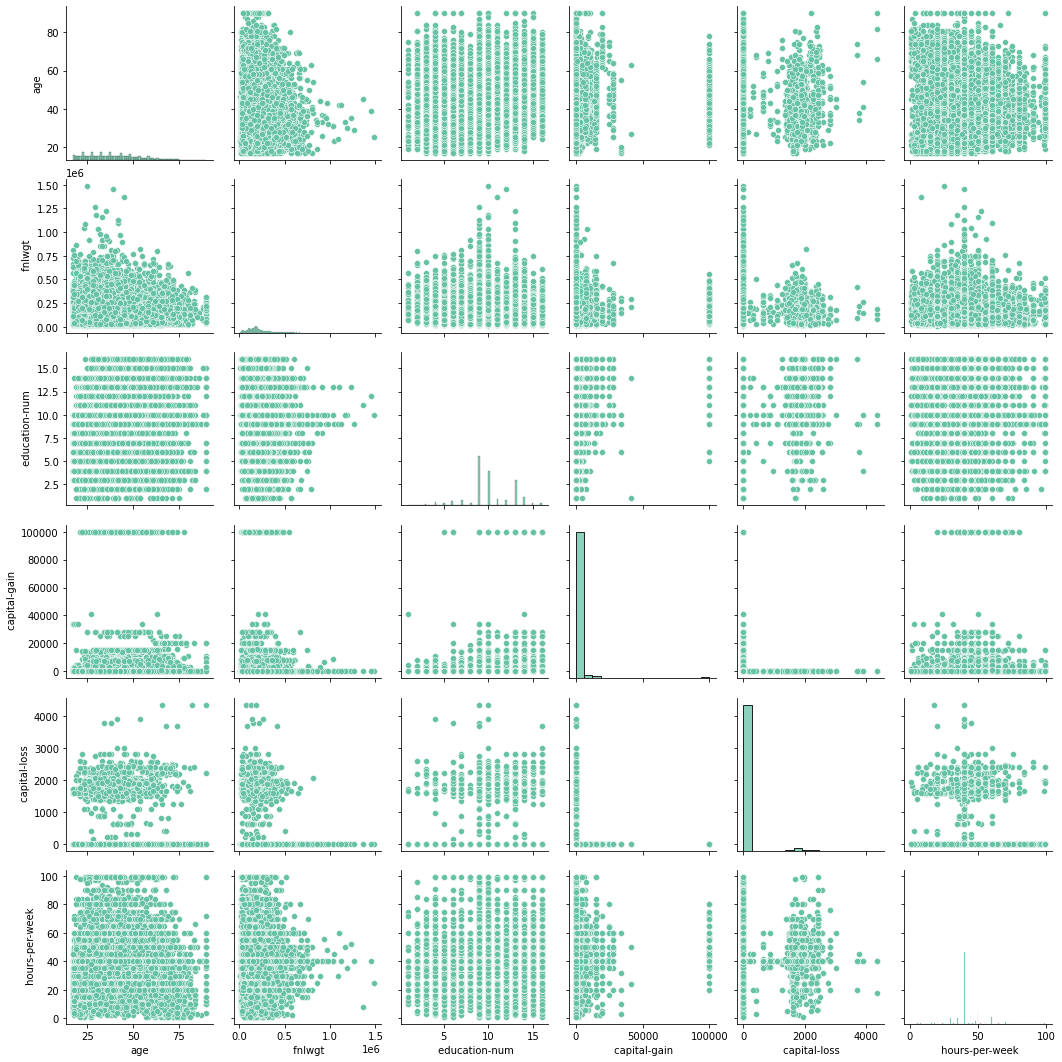

In [21]:
sns.pairplot(data)
plt.show()

We can see that age and fnlwgt are positively skewed.
The variable education_num is negatively skewed while hours_per_week is normally distributed.
There exists weak positive correlation between capital_gain and education_num (correlation coefficient=0.1226).

**Q- In the predictor variables independent of all the other predictor variables?**

Based on this we can surely see the corelation analysis among variable. We have seen that 


1.   age and fnlwgt are positively skewed. education_num is negatively skewed while hours_per_week is normally distributed
2.   There exists weak positive correlation between capital_gain and education_num (correlation coefficient=0.1226).



2. Stastical Method 

In [22]:
df_treat = pd.get_dummies(data)
df_treat.dtypes.value_counts()
df_treat = df_treat.rename(columns=({' income_ <=50K':'minusEqual50',' income_ >50K':'Plus50'}))
df_treat.head(10)



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,minusEqual50,Plus50
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
6,49,160187,5,0,0,16,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,31,45781,14,14084,0,50,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
9,42,159449,13,5178,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [23]:
temp= [df_treat['minusEqual50'],df_treat['Plus50']]
y= pd.DataFrame(temp)
y= y.transpose()
x = df_treat.drop(columns=['minusEqual50','Plus50'])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()


In [26]:
model_LR.fit(x_train,y_train['minusEqual50'])

LogisticRegression()

In [27]:
y_prob = model_LR.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(x_test, y_pred)


from sklearn.model_selection import cross_val_score
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test['minusEqual50'],y_pred)
confusion_matrix

array([[ 418, 1153],
       [ 152, 4790]])

1. The roc_curve function from the sklearn.metrics module is used to compute the 
false positive rate, true positive rate, and thresholds for the ROC curve, using the actual target values y_test['minusEqual50'] and predicted probabilities y_prob.
2. The auc function is then used to calculate the AUC from the false positive rate and true positive rate.
3. The calculated AUC is stored in the roc_auc variable.

# Confusion Matrix

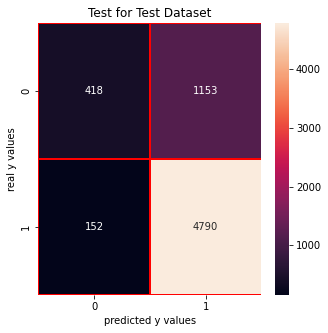

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix=metrics.confusion_matrix(y_test['minusEqual50'],y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(confusion_matrix,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [29]:
auc_roc=metrics.roc_auc_score(y_test['minusEqual50'],y_pred)
auc_roc

0.617657893306467

In [30]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test['minusEqual50'], y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6138845232320637

Text(0.5, 0, 'False Positive Rate')

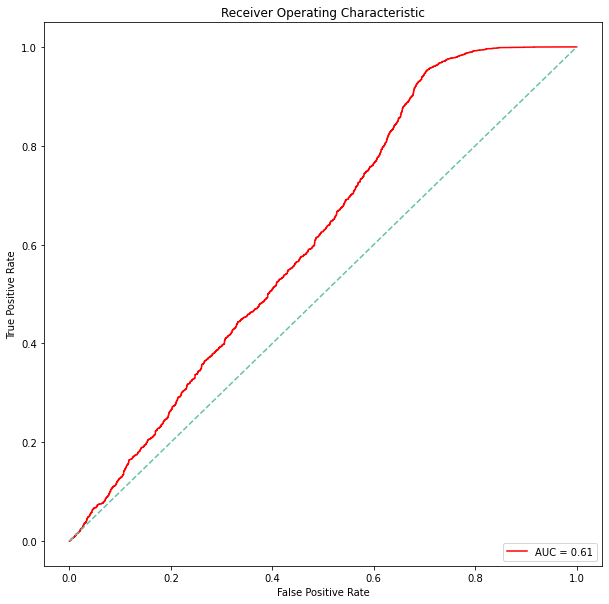

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

An AUC value of **0.61** suggests that the model has moderate accuracy in distinguishing between positive and negative classes. In a ROC curve, AUC represents the measure of the ability of a classifier to distinguish between positive and negative classes. A value of 0.5 represents a random classifier and a value closer to 1 suggests a better classifier, while a value closer to 0 suggests a poor classifier. A value of 0.61 is somewhere in between, indicating that the model has moderate accuracy in making predictions.

3. Feature Selection using random forest classifier


**To start with feature engineering we first need to seperate training and test data and then perform feature scaling and then find importnant features with random forest model**

In [32]:
#declaring vector and target variable

X = data.drop([' income'], axis=1)

y = data[' income']

**Q- Do the training and test sets have the same data?**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [34]:
# print percentage of missing values in the categorical variables in training set
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

X_train[categorical].isnull().mean()

 workclass         0.055985
 education         0.000000
 marital-status    0.000000
 occupation        0.056072
 relationship      0.000000
 race              0.000000
 sex               0.000000
 native-country    0.018164
dtype: float64

In [35]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

 workclass 0.055984555984555984
 occupation 0.05607230607230607
 native-country 0.018164268164268166


In [36]:
for x in [X_train, X_test]:
    x[' workclass'].fillna(X_train[' workclass'].mode()[0], inplace=True)
    x[' occupation'].fillna(X_train[' occupation'].mode()[0], inplace=True)
    x[' native-country'].fillna(X_train[' native-country'].mode()[0], inplace=True)    
   

In [37]:
X_test.isnull().sum()


age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
dtype: int64

In [38]:
X_train.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
dtype: int64

Now there are no missing values in x_train and x_test

**Perform one hot-encoding**
We will use category encoders

In [39]:
!pip install category-encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.6 MB/s eta 0:00:00


In [40]:
import category_encoders as ce
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=[' workclass', ' education', ' marital-status', ' occupation', ' relationship', 
                                 ' race', ' sex', ' native-country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train.shape

(22792, 105)

Using this technique we have increased the number of columns in our training dataset it 105.

In [42]:
X_test.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_test.shape

(9769, 105)

In [44]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_test = pd.DataFrame(X_test, columns=[cols])
X_train = pd.DataFrame(X_train, columns=[cols])


In [45]:
# import Random Forest classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with 100 decision-trees : 0.8521


In [46]:

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with native_country_41 variable removed : 0.8521


In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6848  559]
 [ 886 1476]]


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



In [49]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=0)

**Q- Which predictor variables are the most important?**

In [50]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

 fnlwgt               0.159772
age                   0.149074
 capital-gain         0.091299
 hours-per-week       0.086339
 education-num        0.065130
                        ...   
 native-country_16    0.000028
 occupation_14        0.000015
 native-country_35    0.000009
 workclass_8          0.000008
 native-country_41    0.000000
Length: 105, dtype: float64

Since we have sorted the given data we can see that native-country is the least preferred and fnlwgt is the most important feature. 

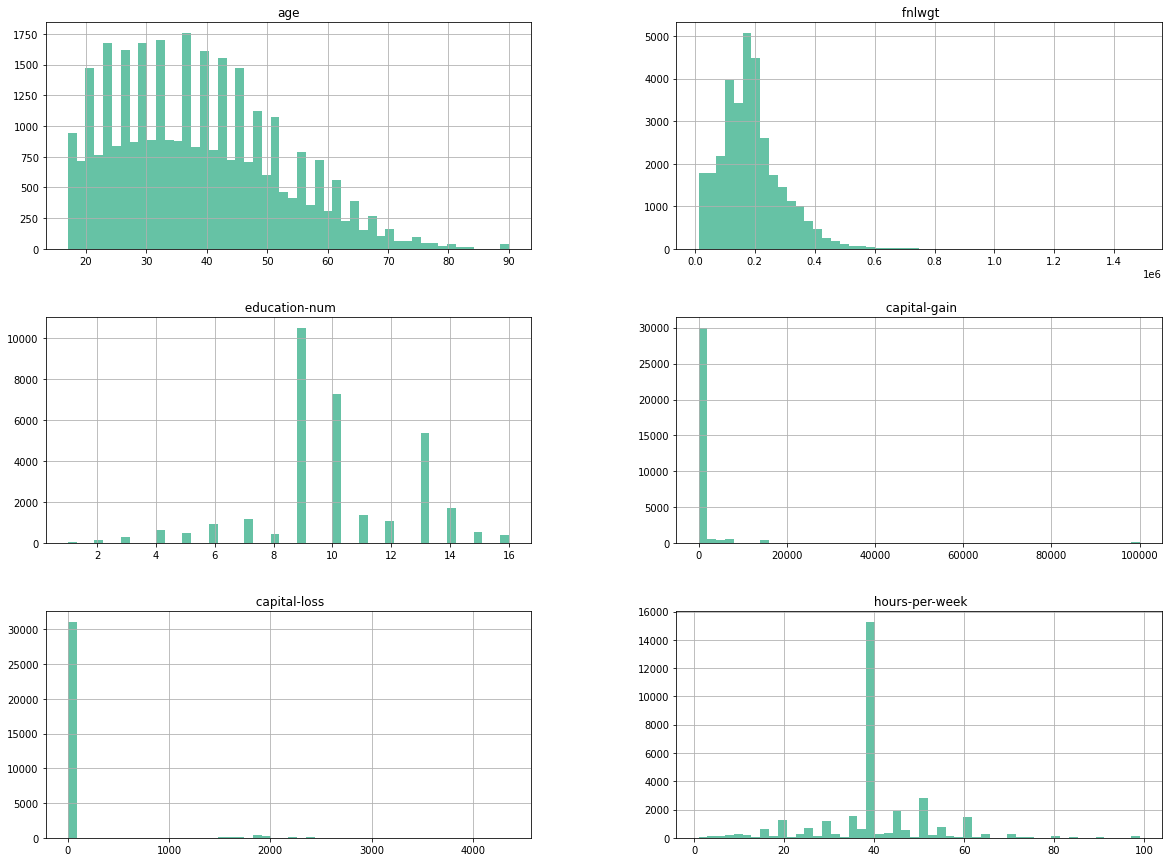

In [51]:
data.hist(bins=50, figsize=(20,15))
plt.show()

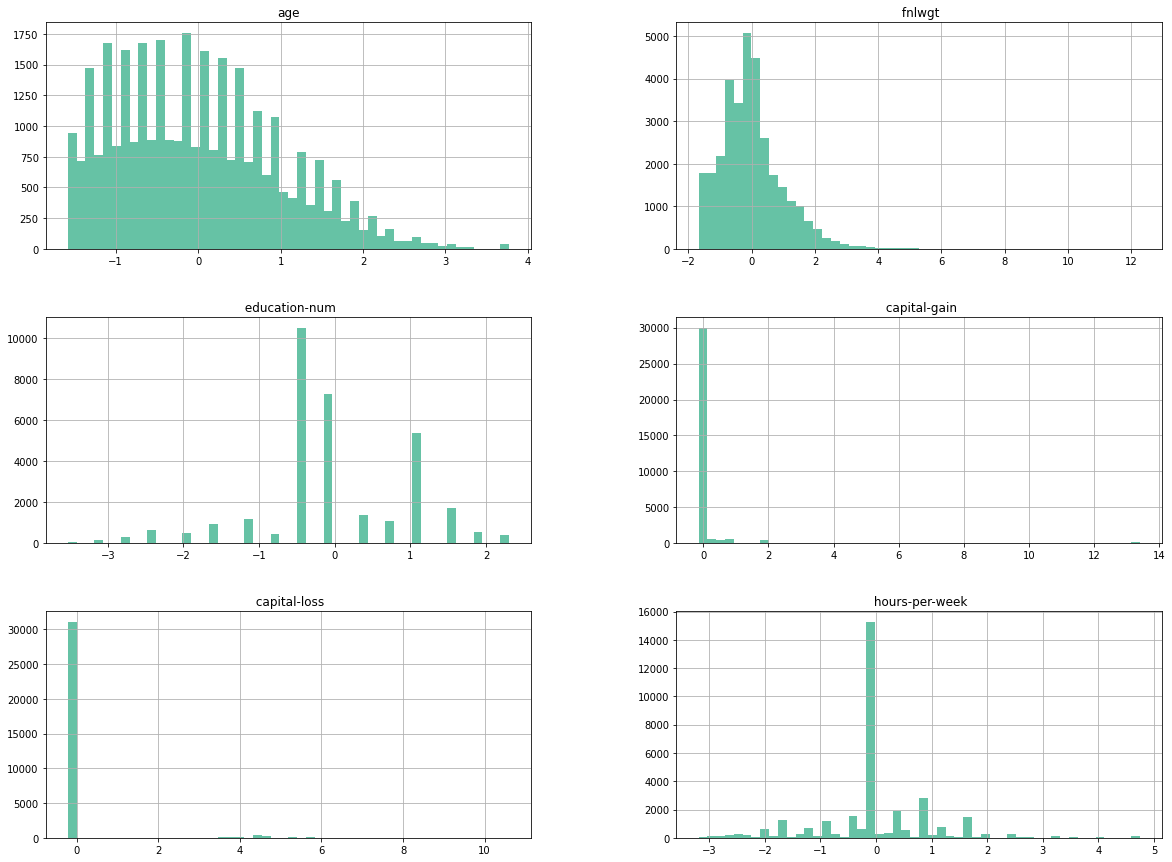

In [52]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to the predictor variables
scaler.fit(data[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])

# Transform the predictor variables using the StandardScaler
data[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']] = scaler.transform(data[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])


data[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']].hist(bins=50, figsize=(20,15))
plt.show()


**Q - Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

**Our idea:**
____________

The code splits the data into predictor variables and target variable, removes a percentage of the data randomly, imputes the missing values using three imputation methods (mean, KNN, and iterative), fits a linear regression model to the complete data, and makes predictions on the missing values using the three imputed datasets. Finally, it calculates the mean absolute error (MAE) and mean squared error (MSE) for each imputation method, which can be used to compare the performance of the model on the three imputed datasets.

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
string_columns = data[[' income']]

encoded_columns = string_columns.apply(encoder.fit_transform)

# Replace the original columns with the encoded columns
data[[' income']] = encoded_columns

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

# Load your data into a DataFrame
df = data

# Split the data into predictor variables and target variable
X = df[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']]
y = df[' income']

# Remove a certain percentage of data randomly
percentage = 0.1
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

# Define the imputation methods
mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

# Impute the missing values using each method
X_mean = mean_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])
X_knn = knn_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])
X_iter = iter_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data and make predictions
model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

# Calculate the performance metrics of the model for each imputation method
mae_mean = mean_absolute_error(df_missing[' income'], y_pred_mean)
mse_mean = mean_squared_error(df_missing[' income'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing[' income'], y_pred_knn)
mse_knn = mean_squared_error(df_missing[' income'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing[' income'], y_pred_iter)
mse_iter = mean_squared_error(df_missing[' income'], y_pred_iter)

# Print the performance metrics
print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')


def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing[' income'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing[' income'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing[' income'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')



Mean Imputation: MAE = 0.30760683112815235, MSE = 0.14423452883539703
KNN Imput : MAE = 0.30760683112815235, MSE = 0.14423452883539703
Mean Imputation: Bias = 0.04280490846200988, Variance = 0.04280490846200988
KNN Imput : Bias = 0.04280490846200988, Variance = 0.04280490846200988
Iterative Imputation: Bias = 0.04280490846200988, Variance = 0.04280490846200988


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

# Load your data into a DataFrame
df = data

# Split the data into predictor variables and target variable
X = df[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']]
y = df[' income']

# Remove a certain percentage of data randomly
percentage = 0.05
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

# Define the imputation methods
mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

# Impute the missing values using each method
X_mean = mean_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])
X_knn = knn_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])
X_iter = iter_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data and make predictions
model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

# Calculate the performance metrics of the model for each imputation method
mae_mean = mean_absolute_error(df_missing[' income'], y_pred_mean)
mse_mean = mean_squared_error(df_missing[' income'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing[' income'], y_pred_knn)
mse_knn = mean_squared_error(df_missing[' income'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing[' income'], y_pred_iter)
mse_iter = mean_squared_error(df_missing[' income'], y_pred_iter)

# Print the performance metrics
print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')

def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing[' income'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing[' income'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing[' income'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')




Mean Imputation: MAE = 0.2930412632702941, MSE = 0.13448918524764797
KNN Imput : MAE = 0.2930412632702941, MSE = 0.13448918524764797
Mean Imputation: Bias = 0.040330174042343944, Variance = 0.040330174042343944
KNN Imput : Bias = 0.040330174042343944, Variance = 0.040330174042343944
Iterative Imputation: Bias = 0.040330174042343944, Variance = 0.040330174042343944


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer

# Load your data into a DataFrame
df = data

# Split the data into predictor variables and target variable
X = df[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']]
y = df[' income']

# Remove a certain percentage of data randomly
percentage = 0.01
missing_rows = np.random.choice(df.index, int(df.shape[0] * percentage), replace=False)
df_missing = df.loc[missing_rows]
df = df.drop(missing_rows)

# Define the imputation methods
mean_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer()
iter_imputer = IterativeImputer()

# Impute the missing values using each method
X_mean = mean_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])
X_knn = knn_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])
X_iter = iter_imputer.fit_transform(df_missing[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data and make predictions
model.fit(X, y)
y_pred = model.predict(X)
y_pred_mean = model.predict(X_mean)
y_pred_knn = model.predict(X_knn)
y_pred_iter = model.predict(X_iter)

# Calculate the performance metrics of the model for each imputation method
mae_mean = mean_absolute_error(df_missing[' income'], y_pred_mean)
mse_mean = mean_squared_error(df_missing[' income'], y_pred_mean)
mae_knn = mean_absolute_error(df_missing[' income'], y_pred_knn)
mse_knn = mean_squared_error(df_missing[' income'], y_pred_knn)
mae_iter = mean_absolute_error(df_missing[' income'], y_pred_iter)
mse_iter = mean_squared_error(df_missing[' income'], y_pred_iter)

# Print the performance metrics
print(f'Mean Imputation: MAE = {mae_mean}, MSE = {mse_mean}')
print(f'KNN Imput : MAE = {mae_knn}, MSE = {mse_knn}')

def calc_bias_variance(y, y_pred):
  y_mean = np.mean(y)
  bias = np.mean((y_mean - y_pred)**2)
  variance = np.mean((y_pred - y_mean)**2)
  return bias, variance

bias_mean, variance_mean = calc_bias_variance(df_missing[' income'], y_pred_mean)
bias_knn, variance_knn = calc_bias_variance(df_missing[' income'], y_pred_knn)
bias_iter, variance_iter = calc_bias_variance(df_missing[' income'], y_pred_iter)

print(f'Mean Imputation: Bias = {bias_mean}, Variance = {variance_mean}')
print(f'KNN Imput : Bias = {bias_knn}, Variance = {variance_knn}')
print(f'Iterative Imputation: Bias = {bias_iter}, Variance = {variance_iter}')




Mean Imputation: MAE = 0.2978417267665189, MSE = 0.1358988754485777
KNN Imput : MAE = 0.2978417267665189, MSE = 0.1358988754485777
Mean Imputation: Bias = 0.041384166219883015, Variance = 0.041384166219883015
KNN Imput : Bias = 0.041384166219883015, Variance = 0.041384166219883015
Iterative Imputation: Bias = 0.041384166219883015, Variance = 0.041384166219883015


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Q - Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

# Load your data into a DataFrame
df = data
df_np = df.apply(pd.to_numeric, errors='coerce')
df_np.dropna(inplace=True)

# Split the data into predictor variables and target variable
X = df[['age',' fnlwgt',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']]
y = df[' income']

# Remove outliers based on Z-score
z = np.abs(stats.zscore(X))
df_without_outliers = df[(z < 3).all(axis=1)]

# Keep the outliers
df_with_outliers = df[(z >= 3).any(axis=1)]

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the data without outliers and make predictions
model.fit(X, y)
y_pred = model.predict(X)

# Fit the model to the data with outliers and make predictions
model_with_outliers = LinearRegression()
model_with_outliers.fit(X, y)
y_pred_with_outliers = model_with_outliers.predict(X)

# Calculate the performance metrics of the models
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse_with_outliers = mean_squared_error(y, y_pred_with_outliers)
mae_with_outliers = mean_absolute_error(y, y_pred_with_outliers)

# Print the performance metrics
print(f'Without Outliers: MAE = {mae}, MSE = {mse}')
print(f'With Outliers: MAE = {mae_with_outliers}, MSE = {mse_with_outliers}')

Without Outliers: MAE = 0.30277501454929956, MSE = 0.1410914179489173
With Outliers: MAE = 0.30277501454929956, MSE = 0.1410914179489173


In [58]:
age_index = data[(data['age'] > 48)].index
data = data.drop(age_index, axis=0)


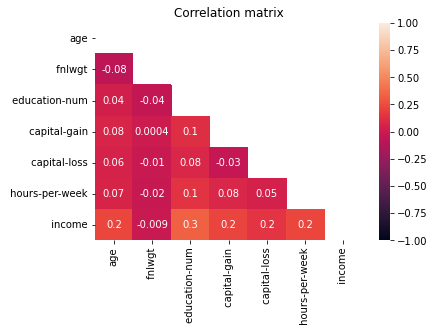

In [59]:
corr = data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix')
plt.show()

We have seen that removing outliners have no major effect on our data. We have also removed a particular age group and checked the correlation matrix values. These still show no changes.

# REFERENCES

1. Dataset- https://raw.githubusercontent.com/paurush11/Assignment1_csv/main/income_evaluation.csv
2. Professor's Notebook- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks 
3. Random Forest Classifier  - https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance

4. Covariance and correlation - https://datatofish.com/covariance-matrix-python/

5. Link to Kaggle Notebook - https://www.kaggle.com/code/paurushbatish/income-classification-dataset-cleaning

